KNN (K Nearest Neighbours)

KNN adalah model machine learning yang dapat digunakan untuk melakukan
prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.

Prediksi yang dilakukan dapat diterapkan baik pada classification maupun
regression tasks.

A. Siapkan Dataset yang Akan Digunakan

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadvariansholeh","key":"ae1f437e2b0a0dc734980f5774716d8e"}'}

1. Upload File kaggle.json

-	Mengunggah file kaggle.json ke Google Colab.
-	File ini adalah file autentikasi API Kaggle yang berisi username dan key API Anda.
-	Fungsinya untuk memungkinkan Google Colab mengakses dan mengunduh dataset dari Kaggle.

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

2. Konfigurasi Direktori Kaggle

-	mkdir -p ~/.kaggle: Membuat folder .kaggle di dalam direktori home jika belum ada. Folder ini digunakan untuk menyimpan file kredensial kaggle.json.
-	cp kaggle.json ~/.kaggle: Menyalin file kaggle.json yang baru saja diunggah ke folder .kaggle agar bisa digunakan oleh CLI Kaggle.
-	chmod 600 ~/.kaggle/kaggle.json: Mengatur izin file agar hanya pengguna saat ini yang dapat mengakses file tersebut. Hal ini meningkatkan keamanan karena mencegah orang lain membaca atau memodifikasi file.

In [3]:
!kaggle datasets download -d waqi786/cats-dataset

Dataset URL: https://www.kaggle.com/datasets/waqi786/cats-dataset
License(s): apache-2.0
  0% 0.00/5.52k [00:00<?, ?B/s]
100% 5.52k/5.52k [00:00<00:00, 13.7MB/s]


3. Mengunduh Dataset dari Kaggle

-	Perintah ini menggunakan Kaggle CLI untuk mengunduh dataset cats-dataset dari akun Kaggle pengguna waqi786.
-	Dataset akan diunduh dalam format .zip ke direktori kerja Google Colab (/content).

In [4]:
!unzip /content/cats-dataset.zip

Archive:  /content/cats-dataset.zip
  inflating: cats_dataset.csv        


4. Ekstraksi File ZIP

-	Mengekstrak file yang diunduh (cats-dataset.zip) agar dapat digunakan. Hasil ekstraksi biasanya berupa file CSV, JSON, gambar, atau format lain tergantung isi dataset.
-	Dalam contoh ini, file yang diekstrak adalah cats_dataset.csv, yang dapat digunakan untuk analisis data.

In [5]:
import pandas as pd
df = pd.read_csv('/content/cats_dataset.csv')
df

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male
...,...,...,...,...,...
995,British Shorthair,19,5,Gray,Female
996,British Shorthair,11,2,Bicolor,Female
997,Savannah,12,5,Bicolor,Female
998,American Shorthair,8,3,Tortoiseshell,Female


5. Mengimpor Pustaka Pandas dan Membaca Data dari CSV

- import pandas as pd: Mengimpor pustaka pandas untuk analisis dan manipulasi data.

- pd.read_csv('/content/cats_dataset.csv'): Membaca file dataset dalam format CSV yang berlokasi di /content/cats_dataset.csv dan mengubahnya menjadi sebuah DataFrame yang disimpan dalam variabel df.

In [6]:
df.describe()

,Age (Years),Weight (kg)
count,1000.000000,1000.00000
mean,10.210000,5.55000
std,5.535751,2.22676
min,1.000000,2.00000
25%,5.000000,4.00000
50%,10.000000,6.00000
75%,15.000000,7.00000
max,19.000000,9.00000


6. Menganalisis Statistik Deskriptif

- df.describe():

Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame, seperti:
- Rata-rata (mean)
- Standar deviasi (std)
- Nilai minimum (min)
- Kuartil (25%, 50%, 75%)
- Nilai maksimum (max)

In [41]:
print(df.isnull().sum())

Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
Jarak          0
dtype: int64


7. Mengecek Data Kosong

- print(df.isnull().sum()): Menghitung jumlah data kosong (missing values) pada setiap kolom dalam DataFrame df dan mencetak hasilnya ke layar. Ini membantu mengidentifikasi kolom mana yang memiliki data hilang sehingga dapat ditangani sebelum analisis lebih lanjut.

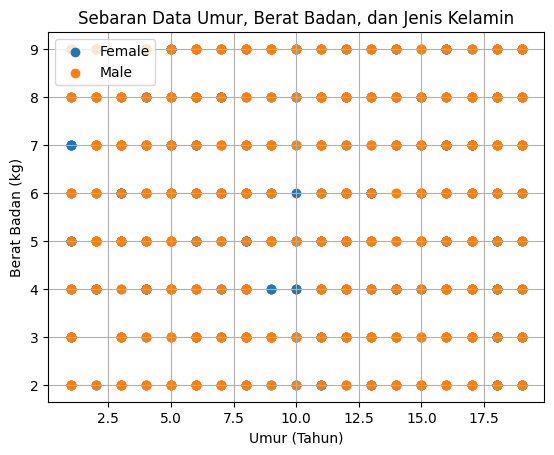

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for gender, d in df.groupby('Gender'):
    ax.scatter(d['Age (Years)'], d['Weight (kg)'], label=gender)

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

1. Visualisasi Sebaran Data

- import matplotlib.pyplot as plt: Mengimpor pustaka matplotlib untuk visualisasi data.
- df.groupby(): Mengelompokkan data berdasarkan kolom Gender.
- ax.scatter(): Membuat scatter plot untuk setiap kelompok data.
- plt.legend(): Menambahkan legenda untuk membedakan kategori.
- plt.title(): Memberikan judul grafik.
- plt.xlabel() dan plt.ylabel(): Menambahkan label pada sumbu X dan Y.
- plt.grid(): Menambahkan grid pada grafik.
- plt.show(): Menampilkan grafik.

B. Classification dengan KNN

In [10]:
import numpy as np

X_train = np.array(df[['Age (Years)', 'Weight (kg)']])
y_train = np.array(df['Gender'])
print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[19  7]
 [19  9]
 [ 3  3]
 ...
 [12  5]
 [ 8  3]
 [11  4]]

y_train: ['Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'
 'F

1. Menyiapkan Data untuk Model

-	import numpy as np: Mengimpor pustaka NumPy untuk komputasi numerik.
-	np.array(): Mengubah DataFrame menjadi array NumPy.
-	df[['Age (Years)', 'Weight (kg)']]: Memilih kolom fitur (Age dan Weight).
-	df['Gender']: Memilih kolom target (Gender).

In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 

2. Encoding Label Target

-	from sklearn.preprocessing import LabelBinarizer: Mengimpor fungsi untuk mengubah data kategorikal menjadi numerik.
-	LabelBinarizer(): Membuat objek encoder.
-	lb.fit_transform(): Mengubah data Gender menjadi nilai numerik:

Male → 1

Female → 0

In [12]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 0 1

3. Flatten Label Target

- .flatten(): Mengubah array 2D menjadi array 1D.

Training KNN Classification Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

1. Membuat dan Melatih Model KNN

-	from sklearn.neighbors import KNeighborsClassifier: Mengimpor algoritma KNN dari pustaka scikit-learn.
-	KNeighborsClassifier(n_neighbors=K): Membuat model KNN dengan K = 3.
-	.fit(): Melatih model menggunakan data training (X_train dan y_train).

C. Prediksi Jenis Kelamin

In [15]:
age = 19
weight = 7
X_new = np.array([age, weight]).reshape(1, -1)
X_new

array([[19,  7]])

1. Data Baru untuk Prediksi

-	np.array(): Membuat array dari data baru.
-	.reshape(1, -1): Mengubah bentuk array agar sesuai dengan input model.

In [16]:
y_new = model.predict(X_new)
y_new

array([0])

2. Melakukan Prediksi

-	.predict(): Menggunakan model KNN untuk memprediksi label data baru.

In [ ]:
lb.inverse_transform(y_new)

3. Konversi Prediksi ke Label

- .inverse_transform(): Mengembalikan label numerik hasil prediksi ke bentuk aslinya (Male/Female).

D. Visualisasi Nearest Neighbours

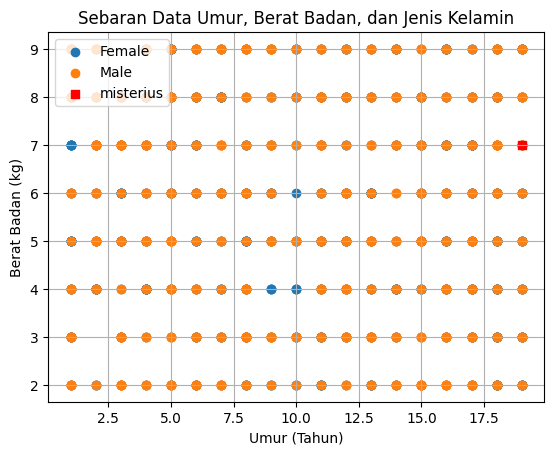

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for gender, d in df.groupby('Gender'):
    ax.scatter(d['Age (Years)'], d['Weight (kg)'], label=gender)

plt.scatter(age, weight,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

1. Visualisasi Data Baru

- Menampilkan titik data baru (dengan warna merah) pada scatter plot yang ada.

E. Kalkulasi Distance (Ecludien Distance)

In [21]:
misterius = np.array([age, weight])
misterius

array([19,  7])

1. Menyimpan Data Baru

- Menyimpan data baru sebagai array untuk analisis lebih lanjut.

In [22]:
X_train

array([[19,  7],
       [19,  9],
       [ 3,  3],
       ...,
       [12,  5],
       [ 8,  3],
       [11,  4]])

2. Menampilkan Data Training

- Menampilkan fitur data training untuk referensi.

In [23]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[0.0,
 2.0,
 16.492422502470642,
 6.082762530298219,
 9.055385138137417,
 10.04987562112089,
 13.152946437965905,
 8.06225774829855,
 17.0,
 8.06225774829855,
 4.242640687119285,
 6.324555320336759,
 3.1622776601683795,
 6.082762530298219,
 4.0,
 5.385164807134504,
 7.211102550927978,
 9.0,
 12.649110640673518,
 14.035668847618199,
 2.23606797749979,
 10.770329614269007,
 13.152946437965905,
 3.1622776601683795,
 13.0,
 13.038404810405298,
 3.1622776601683795,
 18.24828759089466,
 5.385164807134504,
 2.0,
 18.681541692269406,
 8.246211251235321,
 7.211102550927978,
 18.439088914585774,
 11.704699910719626,
 13.601470508735444,
 14.142135623730951,
 14.035668847618199,
 13.92838827718412,
 6.082762530298219,
 4.123105625617661,
 6.708203932499369,
 12.165525060596439,
 11.045361017187261,
 5.385164807134504,
 18.0,
 3.1622776601683795,
 8.246211251235321,
 15.132745950421556,
 15.524174696260024,
 3.605551275463989,
 2.0,
 9.219544457292887,
 13.92838827718412,
 2.23606797749979,
 5.099

3. Menghitung Jarak

-	from scipy.spatial.distance import euclidean: Mengimpor fungsi jarak Euclidean.
-	euclidean(): Menghitung jarak antara dua titik dalam ruang multidimensi.

In [24]:
df['Jarak'] = data_jarak
df.sort_values(['Jarak'])

,Breed,Age (Years),Weight (kg),Color,Gender,Jarak
0,Russian Blue,19,7,Tortoiseshell,Female,0.000000
643,Savannah,19,7,Gray,Male,0.000000
801,Devon Rex,19,7,Orange,Male,0.000000
823,Scottish Fold,19,7,Cream,Male,0.000000
630,Abyssinian,19,7,Tortoiseshell,Male,0.000000
...,...,...,...,...,...,...
30,Oriental,1,2,Tortoiseshell,Female,18.681542
431,Turkish Angora,1,2,Blue,Female,18.681542
310,Oriental,1,2,White,Male,18.681542
363,Russian Blue,1,2,Gray,Male,18.681542


13. Menambahkan Kolom Jarak

-	df['Jarak'] = data_jarak: Menambahkan kolom baru berisi jarak ke data baru.
-	.sort_values(): Mengurutkan data berdasarkan jarak.

F. Evaluasi KNN Classification Model

In [33]:
y_pred = model.predict(X_train)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

15. Prediksi pada Data

- Melakukan prediksi label untuk data uji menggunakan model KNN.

G. Evaluasi Model


In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.605


1.	Accuracy

- Mengukur proporsi prediksi yang benar dibandingkan dengan total data uji
- Cocok untuk data dengan distribusi kelas yang seimbang.

In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_train, y_pred)

print(f'Precission: {prec}')

Precission: 0.6007326007326007


2.	Precision

- Mengukur ketepatan prediksi positif, yaitu seberapa banyak dari prediksi positif yang benar-benar benar.
- Penting saat false positive harus diminimalkan

In [37]:
from sklearn.metrics import recall_score

rec = recall_score(y_train, y_pred)

print(f'Recall: {rec}')

Recall: 0.6495049504950495


3.	Recall
- Mengukur seberapa banyak instance positif yang sebenarnya terdeteksi oleh model.
- Penting saat false negative lebih merugikan

In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6241674595623216


4. F1-Score

- Menyeimbangkan antara precision dan recall dengan menggunakan rata-rata harmonis.
- Berguna untuk menyeimbangkan performa jika ada trade-off antara precision dan recall.

In [39]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_train, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       495
           1       0.60      0.65      0.62       505

    accuracy                           0.60      1000
   macro avg       0.61      0.60      0.60      1000
weighted avg       0.61      0.60      0.60      1000




5.	Classification Report

- Memberikan ringkasan metrik evaluasi.
- Berguna untuk memeriksa performa model KNN pada level kelas

In [40]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_train, y_pred)

print(f'MCC: {mcc}')

MCC: 0.20998098266400672


6.	MCC

Matthews Correlation Coefficient (MCC)

MCC adalah alternatif dari F1 score untuk mengukur performa pengklasifikasi biner.
MCC dari pengklasifikasi yang sempurna adalah 1.
Pengklasifikasi sederhana yang memprediksi secara acak akan mendapatkan nilai 0, dan pengklasifikasi yang benar-benar salah akan mendapatkan nilai -1.

- MCC membantu menilai performa KNN dengan lebih adil, terutama untuk dataset dengan distribusi kelas yang tidak merata.
- MCC menunjukkan apakah nilai K yang dipilih menghasilkan model yang baik atau perlu dioptimalkan.
